In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()



train_data = pd.read_csv('train.csv')
print(train_data.head())

Saving train.csv to train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [7]:
from google.colab import files
uploaded = files.upload()



test_data = pd.read_csv('test.csv')
print(test_data.head())

Saving test.csv to test.csv
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [8]:
from google.colab import files
uploaded = files.upload()



gender_data = pd.read_csv('gender_submission.csv')
print(gender_data.head())

Saving gender_submission.csv to gender_submission.csv
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [9]:
data  = pd.concat([train_data,test_data])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(1309, 12)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#checking the null values

data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [13]:
data.isnull().sum().sum()

np.int64(1698)

We have total 1698 null values present in combined data


In [14]:
#will check the data type of each column


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Since we have more null values for embarked column so we try to either delete or replace it with mode value or the most repeating value

In [15]:
#calculating the mode value for the columns having null values


Survived_mode = data['Survived'].mode()
print('The mode of Survived column is :',Survived_mode)
print()
Age_mode = data['Age'].mode()
print('The mode of Age column is :',Age_mode)
print()
Fare_mode = data['Fare'].mode()
print('The mode of Fare column is :',Fare_mode)
print()
cabin_mode = data['Cabin'].mode()
print('The mode of Cabin column is :',cabin_mode)
print()
Embarked_mode = data['Embarked'].mode()
print('The mode of Embarked column is :',Embarked_mode)
print()


The mode of Survived column is : 0    0.0
Name: Survived, dtype: float64

The mode of Age column is : 0    24.0
Name: Age, dtype: float64

The mode of Fare column is : 0    8.05
Name: Fare, dtype: float64

The mode of Cabin column is : 0    C23 C25 C27
Name: Cabin, dtype: object

The mode of Embarked column is : 0    S
Name: Embarked, dtype: object



In [16]:
# Fill 'Survived' with mode
data['Survived'] = data['Survived'].fillna(data['Survived'].mode()[0])

# Fill 'Age' with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Fill 'Fare' with mean
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

# Fill 'Cabin' with mode (or consider dropping it or extracting deck info instead)
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

# Fill 'Embarked' with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [17]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
  #now will find the catagorical and numerical values


  cat_values  = data.select_dtypes(include=['object'])
  num_values = data.select_dtypes(include=['int64','float64'])

  print('The catagorical values are :',cat_values)
  print()
  print('The numerical values are :',num_values)

The catagorical values are :                                                   Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
413                                 Spector, Mr. Woolf    male   
414                       Oliva y Ocana, Dona. Fermina  female   
415                       Saether, Mr. Simon Sivertsen    male   
416                                Ware, Mr. Frederick    male   
417                           Peter, Master. Michael J    male   

                 Ticket        Cabin Embarked  
0             A/5 21171  C23 C25 C27        S  
1              PC 17599          C85        C  
2      STON/O2. 3101282  C23 C25 C

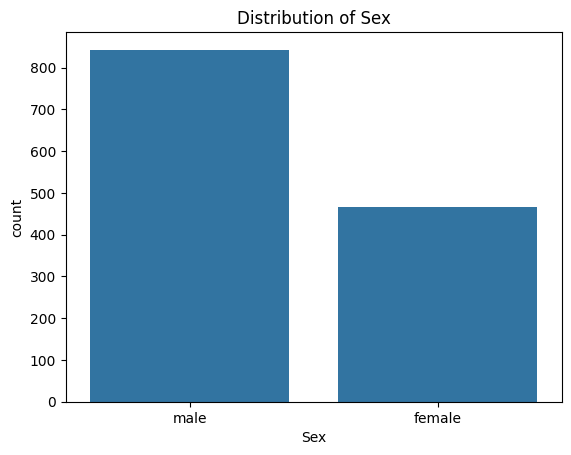

In [19]:
sns.countplot(data=data, x='Sex')
plt.title(f'Distribution of Sex')
plt.show()

In [20]:
Sex_count = data['Sex'].value_counts()
print(Sex_count)

Sex
male      843
female    466
Name: count, dtype: int64


In [21]:
Tickets_count = data['Ticket'].value_counts()
print(Tickets_count)

data['Ticket'].mode()



Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
                ..
A.5. 3236        1
347086           1
365237           1
334915           1
28666            1
Name: count, Length: 929, dtype: int64


,Ticket
0,CA. 2343


In [22]:
data['Ticket'].nunique()

929

In [23]:
import plotly.express as px

fig = px.histogram(data, x='Sex', color='Survived', barmode='group')
fig.show()


In [24]:
import plotly.express as px

fig = px.histogram(data, x='Sex', color='Ticket', barmode='group')
fig.show()


In [25]:
fig = px.bar(data,x='Ticket',y='Sex',color='Survived',barmode='group')
fig.show()

In [26]:
most_common_ticket = data['Ticket'].value_counts().idxmax()
print("Most sold ticket:", most_common_ticket)
print()

filtered_passangers = data[data['Ticket'] == most_common_ticket]
print(filtered_passangers)

sex_counts = filtered_passangers['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']
print(sex_counts)



import plotly.express as px

fig = px.bar(sex_counts,
             x='Sex',
             y='Count',
             color='Sex',
             title=f'Sex Distribution for Most Sold Ticket: {most_common_ticket}')
fig.show()


Most sold ticket: CA. 2343

     PassengerId  Survived  Pclass                               Name     Sex  \
159          160       0.0       3         Sage, Master. Thomas Henry    male   
180          181       0.0       3       Sage, Miss. Constance Gladys  female   
201          202       0.0       3                Sage, Mr. Frederick    male   
324          325       0.0       3           Sage, Mr. George John Jr    male   
792          793       0.0       3            Sage, Miss. Stella Anna  female   
846          847       0.0       3           Sage, Mr. Douglas Bullen    male   
863          864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"  female   
188         1080       0.0       3                    Sage, Miss. Ada  female   
342         1234       0.0       3              Sage, Mr. John George    male   
360         1252       0.0       3        Sage, Master. William Henry    male   
365         1257       0.0       3     Sage, Mrs. John (Annie Bullen)  female   


The ticket with the highest number of passengers was CA.2343, which was purchased by a total of 11 individuals. Among these passengers, 6 were men and 5 were women. This ticket stands out as the most frequently used, indicating it may have been a group booking or a shared travel arrangement. The near-equal gender distribution also suggests a balanced demographic within this group."



In [27]:
#will check least ticket that was sold


least_sold_ticket = data['Ticket'].value_counts().idxmin()
print("Least sold ticket:", least_sold_ticket)
print()

filtered_passangers = data[data['Ticket'] == least_sold_ticket]
print(filtered_passangers)

sex_counts = filtered_passangers['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']
print(sex_counts)


import plotly.express as px

fig = px.bar(sex_counts,
             x='Sex',
             y='Count',
             color='Sex',
             title=f'Sex Distribution for least Sold Ticket: {least_sold_ticket}')
fig.show()

Least sold ticket: SC/PARIS 2159

     PassengerId  Survived  Pclass                            Name   Sex  \
384         1276       0.0       2  Wheeler, Mr. Edwin Frederick""  male   

           Age  SibSp  Parch         Ticket    Fare        Cabin Embarked  
384  29.881138      0      0  SC/PARIS 2159  12.875  C23 C25 C27        S  
    Sex  Count
0  male      1


hence the least sold ticket was SC/PARIS 2159 and it was bought by a male


In [28]:
# lets check how many survived in both the above cases

most_common_ticket_survived = data[(data['Ticket']) == most_common_ticket]['Survived'].value_counts()
print(most_common_ticket_survived)

least_sold_ticket_survived = data[(data['Ticket']) == least_sold_ticket]['Survived'].value_counts()
print(least_sold_ticket_survived)

Survived
0.0    11
Name: count, dtype: int64
Survived
0.0    1
Name: count, dtype: int64


**Most Sold Ticket**:  CA.2343




**Total passengers:** 11

**Survived:** 0

**Did not survive:** 11

 None of the 11 passengers who held this ticket survived.

**Least Sold Ticket**

**Total passengers:** 1

**Survived:** 0

**Did not survive:** 1

 The sole passenger holding the least sold ticket also did not survive.






In [29]:
Survived_sex_data = data.groupby(['Sex','Survived']).size().reset_index()
print(Survived_sex_data)

Total_sex_count = data['Sex'].value_counts()
print("Total sex count is : ",Total_sex_count)
print()
survived_male_count = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Sex'].count()
print("The male count who survived : ",survived_male_count)
print()

Survived_male_percent = (survived_male_count / Total_sex_count['male']) * 100
print("The survived male percent : ",Survived_male_percent)
print()
Survived_female_count = data[(data['Sex']=='female') & (data['Survived']==1)]['Sex'].count()
print("The Survived Female Count : ",Survived_female_count)
print()
Survived_female_percent = (Survived_female_count / Total_sex_count['female']) * 100
print("the Survived Female Percentage : ",Survived_female_percent)
print()
#survived_male_percent = data['Survived'][0].value_counts(normalize=True)*100

#print(survived_male_percent)

      Sex  Survived    0
0  female       0.0  233
1  female       1.0  233
2    male       0.0  734
3    male       1.0  109
Total sex count is :  Sex
male      843
female    466
Name: count, dtype: int64

The male count who survived :  109

The survived male percent :  12.930011862396205

The Survived Female Count :  233

the Survived Female Percentage :  50.0



In [30]:
Embarked_count = data['Embarked'].value_counts()

print(f"The embarked count will be : ",Embarked_count)
print()

The embarked count will be :  Embarked
S    916
C    270
Q    123
Name: count, dtype: int64



In [31]:
Embarked_sex_Survives_data = data.groupby(['Embarked','Sex','Survived']).size().reset_index()

print("The Embarked_sex_Survives_data will be : ",Embarked_sex_Survives_data)

The Embarked_sex_Survives_data will be :     Embarked     Sex  Survived    0
0         C  female       0.0   49
1         C  female       1.0   64
2         C    male       0.0  128
3         C    male       1.0   29
4         Q  female       0.0   33
5         Q  female       1.0   27
6         Q    male       0.0   60
7         Q    male       1.0    3
8         S  female       0.0  151
9         S  female       1.0  142
10        S    male       0.0  546
11        S    male       1.0   77


In [32]:
#total number of survived

Embarked_sex_Survives_data_count  = Embarked_sex_Survives_data[Embarked_sex_Survives_data['Survived'] == 1]
print("The Embarked_sex_Survives_data_count will be :",Embarked_sex_Survives_data_count)

The Embarked_sex_Survives_data_count will be :    Embarked     Sex  Survived    0
1         C  female       1.0   64
3         C    male       1.0   29
5         Q  female       1.0   27
7         Q    male       1.0    3
9         S  female       1.0  142
11        S    male       1.0   77


In [33]:
#total number of survived

Embarked_sex_Survives_data_Male_count = Embarked_sex_Survives_data[(Embarked_sex_Survives_data['Survived'] == 1) & (Embarked_sex_Survives_data['Sex'] == 'male')]
print("The Embarked_sex_Survives_data_Male_count will be :",Embarked_sex_Survives_data_Male_count)
print()

Embarked_sex_Survives_data_Female_count = Embarked_sex_Survives_data [(Embarked_sex_Survives_data['Survived'] ==1 ) & (Embarked_sex_Survives_data['Sex']=='female')]
print("The Embarked_sex_Survives_data_Female_count will be :",Embarked_sex_Survives_data_Female_count)
print()

Embarked_sex_death_data_Male_count = Embarked_sex_Survives_data[(Embarked_sex_Survives_data['Survived']==0)&(Embarked_sex_Survives_data['Sex']=='male')]
print("The Embarked_sex_death_data_Male_count will be :",Embarked_sex_death_data_Male_count)
print()

Embarked_sex_death_data_Female_count = Embarked_sex_Survives_data[(Embarked_sex_Survives_data['Survived']==0)&(Embarked_sex_Survives_data['Sex']=='female')]
print("The Embarked_sex_death_data_Female_count will be :",Embarked_sex_death_data_Female_count)
print()

The Embarked_sex_Survives_data_Male_count will be :    Embarked   Sex  Survived   0
3         C  male       1.0  29
7         Q  male       1.0   3
11        S  male       1.0  77

The Embarked_sex_Survives_data_Female_count will be :   Embarked     Sex  Survived    0
1        C  female       1.0   64
5        Q  female       1.0   27
9        S  female       1.0  142

The Embarked_sex_death_data_Male_count will be :    Embarked   Sex  Survived    0
2         C  male       0.0  128
6         Q  male       0.0   60
10        S  male       0.0  546

The Embarked_sex_death_data_Female_count will be :   Embarked     Sex  Survived    0
0        C  female       0.0   49
4        Q  female       0.0   33
8        S  female       0.0  151



In [34]:
#Survival by Embarked Location and Sex

# Use the Embarked_sex_Survives_data dataframe for plotting the aggregated counts
fig = px.bar(Embarked_sex_Survives_data,
             x='Embarked', # X-axis should be 'Embarked' from the aggregated data
             y=0, # Y-axis should be the count (column named 0 from reset_index())
             color='Survived', # Color bars by 'Survived'
             barmode='group', # Group the bars
             facet_col='Sex', # Create separate columns for 'Sex'
             title='Survival by Embarked Location and Sex',
             labels={'Survived': 'Survived', 0: 'Count'}) # Label the axes and color legend. Also update the label for column 0.
fig.show()

In [35]:
#Survival by Embarked Location and Sex

fig = px.bar(data,
             x='Embarked',
             color='Survived',
             barmode='group',
             facet_col='Sex',
             title='Survival by Embarked Location and Sex',
             labels={'Survived': 'Survived'})
fig.show()

In [36]:
#Bivariate Analysis


import plotly.express as px

fig = px.bar(data,
             x='Pclass', y='Survived',
             title=' Survival  by Pclass')
fig.show()


#Lets find out how many survived in each and every pclass


In [37]:



Pclass_Survived_data = data.groupby(['Pclass','Survived','Sex']).size().reset_index()
print("the Pclass_Survived_data is :",Pclass_Survived_data)

Pclass_value_counts = data['Pclass'].value_counts()
print("the Pclass_value_counts is :",Pclass_value_counts.head())






the Pclass_Survived_data is :     Pclass  Survived     Sex    0
0        1       0.0  female   53
1        1       0.0    male  134
2        1       1.0  female   91
3        1       1.0    male   45
4        2       0.0  female   36
5        2       0.0    male  154
6        2       1.0  female   70
7        2       1.0    male   17
8        3       0.0  female  144
9        3       0.0    male  446
10       3       1.0  female   72
11       3       1.0    male   47
the Pclass_value_counts is : Pclass
3    709
1    323
2    277
Name: count, dtype: int64


In [38]:
# number of passangers survived in all the three types of Pclass

pclass_1_male_survivors = data[(data['Pclass'] == 1) &
                               (data['Survived'] == 1) &
                               (data['Sex'] == 'male')]

# Print count
print(f"Number of Male Survivors survived in Pclass 1: {len(pclass_1_male_survivors)}\n")


pclass_1_female_survivors = data[(data['Pclass']==1)&
                                 (data['Survived']==1)&
                                 (data['Sex']=='female')]

print(f"Number of Female Survivors survived in Pclass 1: {len(pclass_1_female_survivors)}\n")

pclass_2_male_survivors_survived = data[(data['Pclass']==2)&
                                 (data['Survived']==1)&
                                 (data['Sex']=='male')]

print(f"Number of Male Survivors survived in Pclass 2: {len(pclass_2_male_survivors_survived)}\n")

pclass_2_female_survivors_survived = data[(data['Pclass']==2)&
                                 (data['Survived']==1)&
                                 (data['Sex']=='female')]

print(f"Number of Female Survivors survived in Pclass 2: {len(pclass_2_female_survivors_survived)}\n")

pclass_3_male_survivors_survived = data[(data['Pclass']==3)&
                                 (data['Survived']==1)&
                                 (data['Sex']=='male')]


print(f"Number of Male Survivors survived in Pclass 3: {len(pclass_3_male_survivors_survived)}\n")

pclass_3_female_survivors_survived = data[(data['Pclass']==3)&
                                 (data['Survived']==1)&
                                 (data['Sex']=='female')]

print(f"Number of Female Survivors survived in Pclass 3: {len(pclass_3_female_survivors_survived)}\n")



Number of Male Survivors survived in Pclass 1: 45

Number of Female Survivors survived in Pclass 1: 91

Number of Male Survivors survived in Pclass 2: 17

Number of Female Survivors survived in Pclass 2: 70

Number of Male Survivors survived in Pclass 3: 47

Number of Female Survivors survived in Pclass 3: 72



In [39]:
# number of passangers did not survived in all the three types of Pclass

pclass_1_male_survivors_not_survived = data[(data['Pclass'] == 1) &
                                       (data['Survived'] ==0)&
                                            (data['Sex'] == 'male')]


print(f"Number of Male Survivors not survived in Pclass 1: {len(pclass_1_male_survivors_not_survived)}\n")

pclass_1_female_survivors_not_survived = data[(data['Pclass']==1)&
                                 (data['Survived']==0)&
                                 (data['Sex']=='female')]
print(f"Number of Female Survivors not survived in Pclass 1: {len(pclass_1_female_survivors_not_survived)}\n")

pclass_2_male_survivors_not_survived = data[(data['Pclass']==2)&
                                 (data['Survived']==0)&
                                 (data['Sex']=='male')]


print(f"Number of Female Survivors not survived in Pclass 2: {len(pclass_2_male_survivors_not_survived)}\n")

pclass_2_female_survivers_not_survived = data[(data['Pclass']==2)&
                                              (data['Survived']==0)&
                                              (data['Sex']=='female')]
print(f"Number of Female Survivors not survived in Pclass 2: {len(pclass_2_female_survivers_not_survived)}\n")

pclass_3_male_survivors_not_survived = data[(data['Pclass']==3)&
                                            (data['Survived']==0)&
                                            (data['Sex']=='male')]

print(f"Number of male Survivors not survived in Pclass 3: {len(pclass_3_male_survivors_not_survived)}\n")

pclass_3_female_survivors_not_survived = data[(data['Pclass']==3)&
                                              (data['Survived']==0)&
                                              (data['Sex']=='female')]

print(f"Number of Female Survivors not survived in Pclass 3: {len(pclass_3_female_survivors_not_survived)}\n")




Number of Male Survivors not survived in Pclass 1: 134

Number of Female Survivors not survived in Pclass 1: 53

Number of Female Survivors not survived in Pclass 2: 154

Number of Female Survivors not survived in Pclass 2: 36

Number of male Survivors not survived in Pclass 3: 446

Number of Female Survivors not survived in Pclass 3: 144



#Age Distribution

In [40]:
fig = px.box(data, x='Survived', y='Age',
             title='Age Distribution by Survival')
fig.show()

Min Age who lost life is

In [81]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80],
                          labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
#Age distribution vs Pclass

import plotly.express as px

fig = px.histogram(data,
                   x='Age',
                   color='Pclass',
                   nbins=30,
                   title='Age Distribution by Passenger Class',
                   labels={'Age': 'Passenger Age'},
                   barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()


# Create age bins
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Countplot-style survival by AgeGroup
import plotly.express as px

agegroup_survival = data.groupby(['AgeGroup', 'Survived']).size().reset_index(name='Count')

fig = px.bar(agegroup_survival,
             x='AgeGroup',
             y='Count',
             color='Survived',
             barmode='group',
             title='Survival Count by Age Group',
             labels={'Survived': 'Survived (0 = No, 1 = Yes)'})
fig.show()


<ipython-input-81-9298eda76b3a>:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [42]:
data['Parch'].describe()

,Parch
count,1309.000000
mean,0.385027
std,0.865560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [58]:
Sibsp_parch_Sex_df = data[['SibSp','Parch','Sex']]

print(Sibsp_parch_Sex_df.head())

   SibSp  Parch     Sex
0      1      0    male
1      1      0  female
2      0      0  female
3      1      0  female
4      0      0    male


In [50]:
SibSp_value_counts = Sibsp_parch_Sex_df['SibSp'].value_counts()
print(SibSp_value_counts)

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


In [59]:
Parch_value_counts = Sibsp_parch_Sex_df['Parch'].value_counts()

print(Parch_value_counts)

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


In [62]:
data['Family_size'] = data['SibSp'] + data['Parch'] + 1 # Correct calculation for family size

In [68]:
import plotly.express as px

# Group by Family_size and Survived to get count
family_survival_counts = data.groupby(['Family_size', 'Survived']).size().reset_index(name='Count')

# Plot the count of Survived (0 or 1) for each Family_size
fig = px.bar(family_survival_counts,
             x='Family_size',
             y='Count',
             color='Survived',  # shows 0 and 1 in different colors
             barmode='group',   # grouped bars for 0 and 1
             title='Survived vs Family Size Count',
             labels={'Family_size': 'Family Size', 'Count': 'Number of Passengers'})
fig.show()


In [73]:
import plotly.express as px

# Group by SibSp and Survived
sibsp_survival_counts = data.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')

# Plot
fig = px.bar(sibsp_survival_counts,
             x='SibSp',
             y='Count',
             color='Survived',
             barmode='group',
             title='Survival Count by Siblings/Spouse Count',
             labels={'SibSp': 'Number of Siblings/Spouses', 'Count': 'Passenger Count'})
fig.show()


In [77]:
import plotly.express as px

# Group by FamilyType and Survived to get counts
family_type_survival_counts = data.groupby(['FamilyType', 'Survived']).size().reset_index(name='Count')

# Plot
fig = px.bar(family_type_survival_counts,
             x='FamilyType',
             y='Count',
             color='Survived',
             barmode='group',
             title='Survival Count by Family Type',
             labels={'FamilyType': 'Family Type', 'Count': 'Passenger Count'})
fig.show()


<ipython-input-77-d5d6db406fd3>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

